# Quick and Dirty Guide To Numpy


**So you want to learn about numpy?**

Numpy is an important library for anyone wanting to work with large scale datasets in Python.  Numpy arrays provide value because they are easier and faster to manipulate than traditional python lists.

### Why use numpy arrays instead of Python lists?

1. Saves you time as a programmer: when using lists, you have to use loops to apply a function to each element of an array.  In numpy, all common mathematical computations can be vectorized.  This leads to a much faster runtime, as well as fewer lines of code. 

2. Under the hood, numpy arrays use less memory, and are constrained to a single data type, which enables faster execution.

<img src="memory_diagram.png">

The figure above shows the memory diagram of a numpy array.  Python lists have special functionality where their elements don't all have to be of the same type.  As a result, under the hood python lists are actually an array of pointers that point to the actual array elements.  Hopefully, this fact provides some intuition as to why many operations run faster with numpy arrays as the underlying data structure! Neat!

### Let's get started!

In [57]:
#It's a common convention to abbreviate numpy as np
import numpy as np

### Creating a Numpy Array
There are many ways to create a numpy array.  In general, the options are 
- converting other Python data structures to np.array format
- numpy functions that create new arrays (i.e. np.ones, np.zeros, np.arange)
- reading files from disk (in this class, mostly images)

In [58]:
#unlike lists, you cannot create an empty numpy array
print("1 dimensional: ")
x = np.array([1,2,3,4,5])
print("Shape: ", x.shape)
x

1 dimensional: 
Shape:  (5,)


array([1, 2, 3, 4, 5])

In [59]:
print("2 dimensional: ")
y = np.array([[1,2,3,4,5], [6,7,8,9,10]])
print("Shape: ", y.shape)
y

2 dimensional: 
Shape:  (2, 5)


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [60]:
print("you can create an array of any dimensions using np.zeros")
#the double parentheses mean that you are specifying the shape of the array as a tuple
z = np.zeros((3,3))
z

you can create an array of any dimensions using np.zeros


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [61]:
#other handy things
identity = np.identity(3)
print(identity)

ones = np.ones((2,2))
ones

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([[1., 1.],
       [1., 1.]])

### Accessing elements

In [62]:
#just like a list, np arrays are zero indexed.  This gets the 0th row, col
print(identity[0,0])

#you can also slice arrays
print(identity[0:2, 0:2]) # takes everything up to, but not including, the end index

1.0
[[1. 0.]
 [0. 1.]]


### Array attributes

In [63]:
print(identity.shape) #returns tuple of dimensions
print(identity.size) # returns total number of elements
print(identity.dtype) #the default dtype is float64

(3, 3)
9
float64


In [64]:
#To specify a specific data type, use the dtype parameter in the np.array constructor
x = np.array([1,2,3,4], dtype = np.int32)
x.dtype

dtype('int32')

### Matrix Operations
Numpy makes it easy to do matrix operations on arrays, like multiply, invert, etc.

In [65]:
x = np.ones((3,3))
y = np.zeros((3,3))
eye = np.identity(3)

#all arithmetic operations are applied to a matrix element-wise
print("Original: ")
print(x)
print()
print(x + 1)
print()
print(4.5*x)
print()
print(x/2.0)

Original: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]

[[4.5 4.5 4.5]
 [4.5 4.5 4.5]
 [4.5 4.5 4.5]]

[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]


In [66]:
#using the multiplication operator will do elementwise multiplication, NOT matrix multiplication
x*eye

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [67]:
# np.dot can be used for inner products, or for plain - ole matrix multiplication
# to do matrix multiplication, use the np.dot function
np.dot(x, eye)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [68]:
#numpy arrays have builtin methods to calculate summary statistics such as std. dev., mean, min, max, sum
y = np.random.random(9).reshape(3,3)
print("std:", y.std())
print("mean:", y.mean())
print("sum:", y.sum())

print()
#you can also do these operations with respect to a particular axis
print("std (rows):", y.std(axis = 1))
print("mean (rows):", y.mean(axis = 1))

std: 0.3111875200585419
mean: 0.4546370641085876
sum: 4.091733576977289

std (rows): [0.11878014 0.14678837 0.25168901]
mean (rows): [0.81014073 0.2457739  0.30799657]


### np concatenate will be your best friend in this class...
A complete list of possible array manipulations can be found here:
https://numpy.org/devdocs/reference/routines.array-manipulation.html

In [69]:
np.concatenate((x,y), axis = 0)

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.72800379, 0.97810769, 0.7243107 ],
       [0.31636559, 0.37954267, 0.04141343],
       [0.00206363, 0.61852197, 0.3034041 ]])

In [70]:
result = np.concatenate((x,y), axis = 1)
result

array([[1.        , 1.        , 1.        , 0.72800379, 0.97810769,
        0.7243107 ],
       [1.        , 1.        , 1.        , 0.31636559, 0.37954267,
        0.04141343],
       [1.        , 1.        , 1.        , 0.00206363, 0.61852197,
        0.3034041 ]])

In [71]:
#not an inplace operation, if you want it to persist you need to reassign the variable using =
np.transpose(result)

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.72800379, 0.31636559, 0.00206363],
       [0.97810769, 0.37954267, 0.61852197],
       [0.7243107 , 0.04141343, 0.3034041 ]])

In [72]:
#to invert a matrix use np.linalg.inv
x = np.array([[1,1], [1,0]])
np.linalg.inv(x)

array([[ 0.,  1.],
       [ 1., -1.]])

### Broadcasting
The term broadcasting refers to how numpy treats doing arithmetic operations on arrays of different shapes.
When operating on two arrays, NumPy compares their shapes element-wise. Two dimensions are compatible when
* they are equal, or
* one of them is 1

If the dimensional are different, but one of them is 1, then numpy will apply the operation to each column on that axis

In [73]:
x = np.array(range(5))
x = x.reshape(5, 1)
print("x is a column vector")
print()
print(x.shape)
print(x)

y = np.ones((5))
print("y is a row vector")
print(y.shape)
print(y)

x is a column vector

(5, 1)
[[0]
 [1]
 [2]
 [3]
 [4]]
y is a row vector
(5,)
[1. 1. 1. 1. 1.]


In [74]:
print(x+y)

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]]


### Real world example of why broadcasting is useful

In [75]:
# Suppose we have a matrix where we want to normalize the rows to have mean zero
matrix = 10*np.random.rand(4,5)
matrix

array([[8.50057263, 0.51002501, 4.6810978 , 0.87355945, 5.37510142],
       [4.96818429, 3.0227087 , 8.39227446, 7.44134361, 5.75832599],
       [1.75988059, 5.94542306, 8.80912363, 0.7248198 , 8.58829046],
       [1.16507216, 3.09655444, 8.07810409, 0.79872669, 0.41745937]])

In [76]:
row_means = matrix.mean(axis = 1).reshape((4,1))
row_means

array([[3.98807126],
       [5.91656741],
       [5.16550751],
       [2.71118335]])

In [77]:
matrix = matrix - row_means
print(matrix)
matrix.mean(axis = 1)

[[ 4.51250137 -3.47804625  0.69302654 -3.11451181  1.38703016]
 [-0.94838312 -2.89385871  2.47570705  1.5247762  -0.15824142]
 [-3.40562692  0.77991555  3.64361612 -4.44068771  3.42278295]
 [-1.54611119  0.38537109  5.36692074 -1.91245666 -2.29372398]]


array([ 0.00000000e+00, -9.76996262e-16,  1.77635684e-16,  8.88178420e-17])

### Using boolean masks
In numpy, when you compare two arrays, you get a boolean mask as the output.  You can then use this boolean mask to grab specific values in an array.

In [78]:
array = np.array(range(20)).reshape((4,5))
output = array > 10
output

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [79]:
array[output]

array([11, 12, 13, 14, 15, 16, 17, 18, 19])

In [80]:
#you can combine boolean statements for more complicated operations
mask = (array < 5) | (array > 15)
mask

array([[ True,  True,  True,  True,  True],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True]])

## Practice boolean mask problem
Given a matrix, change all of the negative values to zero

In [81]:
matrix = 2*np.random.rand(5, 5) - 1
print(matrix)

[[-0.5517933  -0.71784142  0.57321858  0.83605787 -0.69921848]
 [-0.20926588  0.47043976 -0.42005849 -0.44149884 -0.95876487]
 [-0.02031818 -0.27472668 -0.52179708 -0.29376591  0.76773838]
 [ 0.38575626  0.1419559   0.35056287 -0.67045283 -0.32210338]
 [ 0.52627008  0.00724117 -0.87050963 -0.41315852  0.97374769]]


In [82]:
### SOLUTION ###
mask = matrix < 0
print(mask)
matrix[mask] = 0
print(matrix)

[[ True  True False False  True]
 [ True False  True  True  True]
 [ True  True  True  True False]
 [False False False  True  True]
 [False False  True  True False]]
[[0.         0.         0.57321858 0.83605787 0.        ]
 [0.         0.47043976 0.         0.         0.        ]
 [0.         0.         0.         0.         0.76773838]
 [0.38575626 0.1419559  0.35056287 0.         0.        ]
 [0.52627008 0.00724117 0.         0.         0.97374769]]


### Reshaping

In [83]:
#when your reshape, by default you fill the new array by rows
x = np.linspace(1, 12, 6)
print(x)
x = x.reshape((3,2)) #does not reshape in place!
x

[ 1.   3.2  5.4  7.6  9.8 12. ]


array([[ 1. ,  3.2],
       [ 5.4,  7.6],
       [ 9.8, 12. ]])

# Demo
Imagine I want to apply the function $f(x) = x^2 + x -6$ to every emelent of an array

In [84]:
#First let's try it with python lists
import random
random.seed(1)
h = 1000
w = 2

def func(x):
    return x**2 + x - 6

first_list = [[random.randint(-10,10), random.randint(-10,10)] for i in range(h)]
print(len(first_list))
first_list[:10]


1000


[[-6, 8],
 [-8, -2],
 [-7, 5],
 [4, 5],
 [10, 2],
 [-4, -7],
 [5, -10],
 [2, 3],
 [9, -10],
 [4, -2]]

In [85]:
%%time
for i in range(h):
    for j in range(w):
        first_list[i][j] = func(first_list[i][j])

CPU times: user 4.59 ms, sys: 614 µs, total: 5.2 ms
Wall time: 6.41 ms


In [86]:
first_list[:10]

[[24, 66],
 [50, -4],
 [36, 24],
 [14, 24],
 [104, 0],
 [6, 36],
 [24, 84],
 [0, 6],
 [84, 84],
 [14, -4]]

### Now let's do the same thing with numpy arrays

In [87]:
#By default, rand returns a rnadom number in the range [0,1) - so we normalize to get the values we want
array = np.random.rand(h* w).reshape((h,w))
array = array*20 - 10
print(array[:10])

[[-1.86603566  2.44628518]
 [ 7.03082494 -8.73944427]
 [-8.16959725  3.64535153]
 [-2.60113381 -9.24291479]
 [-9.53117196 -1.18232172]
 [ 5.081607   -1.81093182]
 [ 5.37530292  4.85702879]
 [-8.96450359 -6.31840594]
 [-6.40328421  9.41562887]
 [ 5.69231651  8.11987624]]


In [88]:
%%time
array = array**2 + array - 6

CPU times: user 602 µs, sys: 1.54 ms, total: 2.14 ms
Wall time: 1.72 ms


In [89]:
#Check that it worked
print(array[:10])

[[-4.38394659  2.43059638]
 [50.46332428 61.6384419 ]
 [52.57272192 10.93393931]
 [-1.83523669 70.18855907]
 [75.31206697 -5.78443708]
 [24.90433672 -4.53145776]
 [28.26918436 22.4477575 ]
 [65.39782107 27.60384772]
 [28.59876442 92.06969598]
 [32.09478378 68.05226648]]


### It's way faster!

# Making Plots in Jupyter Notebook
A Matplotlib figure can be categorized into several parts as below:
    
**Figure:** It is a whole figure which may contain one or more than one axes (plots). You can think of a Figure as a canvas which contains plots.

**Axes:** It is what we generally think of as a plot. A Figure can contain many Axes. It contains two or three (in the case of 3D) Axis objects. Each Axes has a title, an x-label and a y-label.

**Axis:** They are the number line like objects and take care of generating the graph limits.

In [90]:
import matplotlib.pyplot as plt

[ 0  1  4  9 16 25 36 49 64 81]


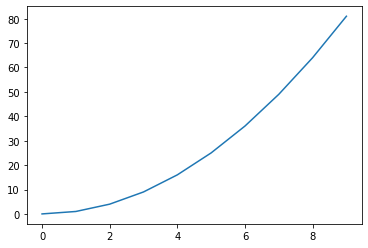

In [91]:
x = np.arange(10)**2
print(x)
plt.plot(x)
plt.show()

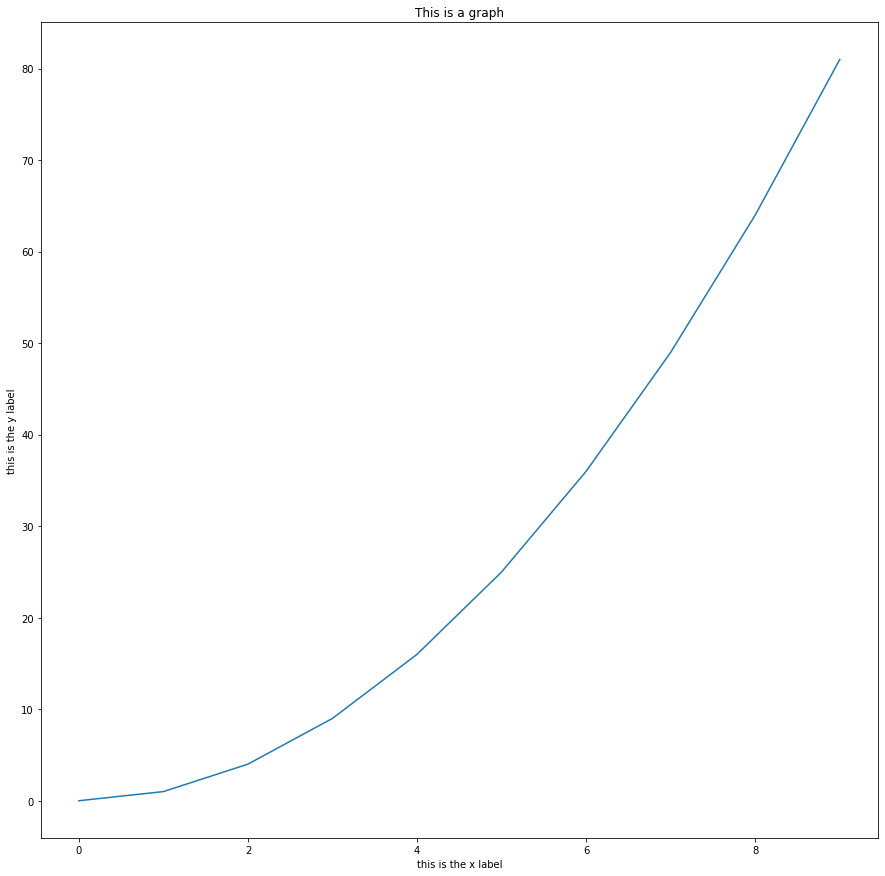

In [92]:
plt.figure(figsize = (15,15))
plt.plot(x)
plt.title("This is a graph")
plt.xlabel("this is the x label")
plt.ylabel("this is the y label")
plt.show()

# Part 2

### Data Structures in Python
You may have noticed that it can be tricky to manipulate arrays in python because by default, python passed objects as references. In this section, we'll explain this behavior, and giving some debugging tools to use when confronted with related issues.

In [93]:
array = np.linspace(1, 10, 10)
array

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [94]:
dup = array
dup

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [95]:
array[0] = 100
dup

array([100.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [96]:
print(id(array))
print(id(dup))

4539540384
4539540384


### Notice that the dup and array point to the same object!
How would we fix this?

### Use the copy library, or np.array.copy
IMPORTANT: Using the slicing syntax [:] doesn't always work

In [97]:
#slicing
array = np.linspace(1, 10, 10)
dup = array[:]
print(id(array))
print(id(dup))
array[0] = 100
dup

4539540064
4382260080


array([100.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [98]:
#using copy
import copy
array = np.linspace(1, 10, 10)
dup = copy.deepcopy(array)
print(id(array))
print(id(dup))
array[0] = 100
dup

4382260240
4539540064


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Beware of copy vs. deepcopy!

https://docs.python.org/2/library/copy.html
<img src="shallow_copy.png">
<img src="deep_copy.png">

In [99]:
#numpy arrays also have a builtin copy function
array = np.linspace(1, 10, 10)
dup = array.copy()
print(id(array))
print(id(dup))
array[0] = 100
dup

4759156176
4382260240


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### Let's try it with multidimensional arrays

In [100]:
def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def load(image_path):
    out = io.imread(image_path)

    # Let's convert the image to be between the correct range.
    out = out.astype(np.float64) / 255
    return out

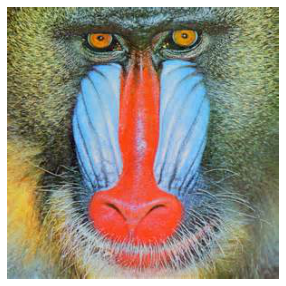

In [101]:
from skimage import io
img = load('image1.jpg')
display(img)

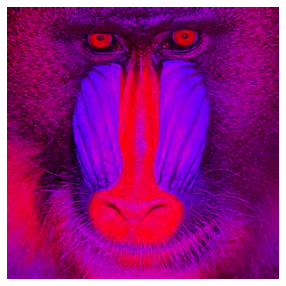

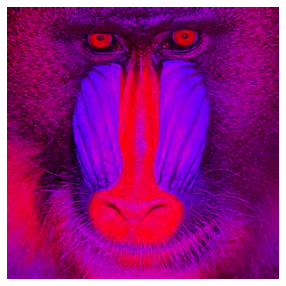

In [102]:
def rgb_exclusion(image, channel):
    out = image
    if channel == 'R':
        out[:, :, 0] = 0
    elif channel == 'G':
        out[:, :, 1] = 0
    elif channel == 'B':
        out[:, :, 2] = 0

    return out

no_green = rgb_exclusion(img, 'G')
display(no_green)

display(img)

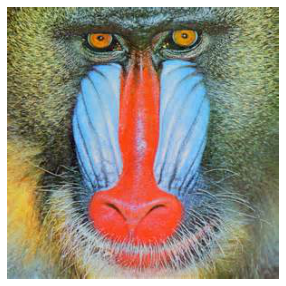

In [103]:
img = load('image1.jpg')
display(img)

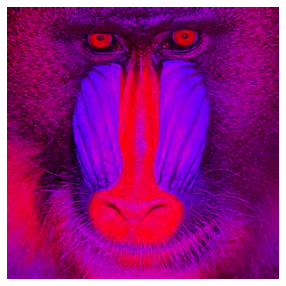

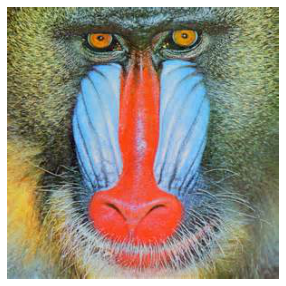

In [104]:
#TODO: How to fix?
def rgb_exclusion(image, channel):
    out = image.copy()
    if channel == 'R':
        out[:, :, 0] = 0
    elif channel == 'G':
        out[:, :, 1] = 0
    elif channel == 'B':
        out[:, :, 2] = 0

    return out

no_green = rgb_exclusion(img, 'G')
display(no_green)

display(img)

# Summary: when in doubt, use deepcopy

### Sorting

In [105]:
test = np.random.random(10)
print(test)
print(np.sort(test))
print(np.argsort(test))

[0.08772994 0.56444287 0.67352189 0.56320978 0.99818353 0.4581044
 0.86746082 0.51897823 0.57330987 0.6984918 ]
[0.08772994 0.4581044  0.51897823 0.56320978 0.56444287 0.57330987
 0.67352189 0.6984918  0.86746082 0.99818353]
[0 5 7 3 1 8 2 9 6 4]


### Linear Algebra
We can use the np.linalg module to do a lot of linear algebra stuff withpretty clean syntax.

For example, say we wanted to solve the linear system $$ Ax = b$$.

In [106]:
A = np.array([[1, 1], [2, 1]])
b = np.array([[1], [0]])
#This function takes parameters A, b, and returns x such that Ax =b. 
x = np.linalg.solve(A, b)
x              

array([[-1.],
       [ 2.]])

### How about more complicated stuff?
Imagine trying to find a line of best fit.

Linear regression finds the "line of best fit" by minimizing the residual sum of squares.

If we have n datapoints $\{(x_1, y_1), ... ,(x_n, y_n)\}$, the objective function takes the form
$$loss(X) = \Sigma_{i = 1}^n (y_i - f(x_i))^2$$ where $$f(x_i) = \theta_0 + \theta_1 x_1 + ... +\theta_n x_n$$

It turns out the parameters such that the loss function is minimized are given by the closed form solution

$$\theta = (X^T X)^{-1} X^T y$$

Let's see it in action!!!

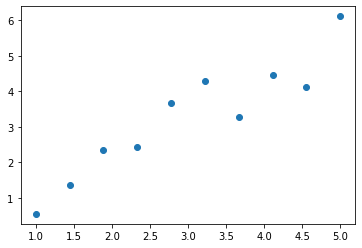

In [107]:
x = np.concatenate((np.linspace(1, 5, 10).reshape(10, 1), np.ones(10).reshape(10, 1)), axis = 1)
y = x[:,0].copy() + 2*np.random.rand(10) - 0.5
plt.scatter(x[:,0], y)

In [108]:
theta = np.linalg.lstsq(x, y, rcond=None)[0]
print(theta)

[ 1.13481975 -0.14582167]


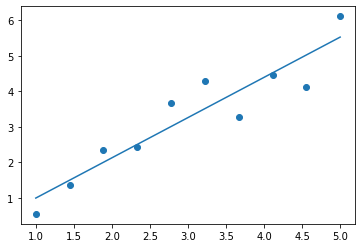

In [109]:
plt.scatter(x[:,0], y)
plt.plot(x[:,0], x[:,0]*theta[0] + theta[1])

In [110]:
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(theta)

[ 1.13481975 -0.14582167]


### Vectorizing equations
In a couple of homeworks, you'll gain experience formulating equations in matrix format.  This can be really tough, so let's go through an example for how to think about it!

Suppose we didn't know that linear regression had a closed form solution. We could also solve the problem above using gradient descent.

The gradient descent update rule looks like this:
$$\theta_{t+1} =\theta_t - \alpha \nabla_{\theta} L(\theta, X)$$

So we need to find the gradient with respect to $\theta$. Recall that a gradient is a vector of partial derivatives.  So let's start by finding just one partial derivative.

$$\frac{\partial}{\partial \theta_j}L(\theta, X) = \Sigma_{i = 1}^n 2(y_i - f(x_i))(-x_i[j])$$ where $$f(x_i) = \theta_0 + \theta_1 x_1 + ... +\theta_n x_n$$

Now the task is to get this into matrix format! Our theta vector is $\theta = [\theta_0,\theta_1] \in R^2$. Notice that our residuals can be written as a vector, $y - f(\theta, X) \in R^n$.

In matrix multiplication, we dot the row of the first matrix with the columns of the second matrix.  A sum (like above) can oftern be expressed as a row times a column.

$$\theta_{t+1} =\theta_t - \alpha X^T (y - f(X, \theta))$$




    

### Additional Resources
https://www.youtube.com/watch?v=8Mpc9ukltVA

https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596

https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html

https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/